In [544]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def ROC(X,Y,w1,b1,w2,b2):
    threshold = np.linspace(1000,0, 1001)
    threshold = threshold/1000
    tprs = []
    fprs = []
    for i in threshold:
        tprs.append(np.sum(np.multiply((sig(tanh(X@w1 + b1)@w2+b2)>i),Y))/np.sum(Y))
        fprs.append(np.sum(np.multiply((sig(tanh(X@w1 + b1)@w2+b2)>i),1 - Y))/np.sum(1 - Y))
    plt.plot(fprs,tprs)
    plt.plot([0,1],[0,1], c = 'black')
    plt.xlabel("False Positive Rate",fontsize = 14)
    plt.ylabel("True Positive Rate", fontsize = 14)
    plt.title("ROC", fontsize  = 20)
    leg = "AUC = "+str((np.sum(np.multiply(tprs[0:1000],np.diff(fprs)))+np.sum(np.multiply(tprs[1:1001],np.diff(fprs))))/2)
    plt.text(.58,0,leg, fontsize = 14)
    plt.show()
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
def sig(X):
    return 1/(1+np.exp(-X))
data = pd.read_csv('input.csv').as_matrix()

/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


1330


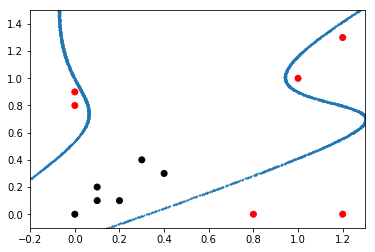

In [556]:
Y = np.matrix(data[:,2])
X = np.matrix(data[:,0:2])
flag = False
i = 0
while flag == False:  
    i = i+1
    w1 = np.random.randn(2,6)
    b1 = np.random.randn(1,6)
    w2 = np.random.randn(6,1)
    b2 = np.random.randn(1,1)
    newY = np.round(sig(tanh(X@w1 + b1)@w2+b2))
    if np.array_equal(newY,Y.T):
        flag = True
print(i)
r = newY.T.tolist()[0]
fakeX = np.random.uniform(-3,3,(10000000,2))
newx = np.matrix(fakeX[np.where(abs(tanh(fakeX@w1 + b1)@w2+b2)<.001)[0]])
colors = ['black','red']
r = [colors[i] for i in Y.astype(int).tolist()[0]]
plt.scatter(X[:,0].tolist(),X[:,1].tolist(), c =r)
plt.xlim(-.2,1.3)
plt.ylim(-.1,1.5)
plt.scatter(newx[:,0].T.tolist()[0],newx[:,1].T.tolist()[0], s = .5)

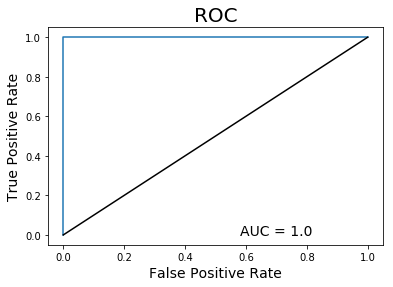

In [557]:
ROC(X,Y.T,w1,b1,w2,b2)